### ``Regularization`` - Keras
* **Regularization** is a set of techniques that can prevent overfitting in neural networks and thus improve the accuracy of a Deep Learning model when facing completely new data from the problem domain.

1. **Overfitting** 

One of the most important aspects when training neural networks is avoiding overfitting. **Overfitting** refers to the phenomenon where a neural network models the training data very well but fails when it sees new data from the same problem domain. **Overfitting** is caused by noise in the training data that the neural network picks up during training and learns it as an underlying concept of the data.

2. What is **Regularization**?
 
Regularization refers to a set of different techniques that lower the complexity of a neural network model during training, and thus prevent the overfitting. There are `3` main techniques that can be used for regularization which are:
 * **L1** regularization
 * **L2** regularization
 * **Dropout**

2.1 **L2 Regularization** -
The L2 regularization is the most common type of all regularization techniques and is also commonly known as weight decay or Ride Regression. Performing L2 regularization encourages the weight values towards zero **(but not exactly zero)**
The 2 regularization penalty is computed as: 

````
loss = l2 * reduce_sum(square(x))
````

2.2 **L1 Regularization** -
In the case of L1 regularization (also knows as Lasso regression), we simply use another regularization term Ω. This term is the sum of the absolute values of the weight parameters in a weight matrix. During the L1 regularization, the weight are always forced all the way towards zero. Performing L1 regularization encourages the weight values to be zero
The L1 regularization penalty is computed as: 

````
loss = l1 * reduce_sum(abs(x))
````

2.3 **Dropout**
In a nutshell, dropout means that during training with some probability P a neuron of the neural network gets turned off during training. 

### Notes:
* Overfitting occurs in more complex neural network models (many layers, many neurons)
* Complexity of the neural network can be reduced by using L1 and L2 regularization as well as dropout.
* L1 regularization forces the weight parameters to become zero.
* L2 regularization forces the weight parameters towards zero (but never exactly zero).
* Smaller weight parameters make some neurons neglectable → neural network becomes less complex → less overfitting
* During dropout, some neurons get deactivated with a random probability P → Neural network becomes less complex → less overfitting

1. [Ref](https://towardsdatascience.com/regularization-in-deep-learning-l1-l2-and-dropout-377e75acc036)
2. [Ref](https://www.analyticsvidhya.com/blog/2018/04/fundamentals-deep-learning-regularization-techniques/)

### Applying a dropout layer.
The following snippet shows how we can apply a dropout layer as a way of reducing overfitting in keras.

```python
model = keras.Sequentail([
  ...
  keras.layers.Dense(100, activation=None),
  keras.layers.Dropout(p=.5)
  ...
])
```

### Appling `l1` or `l2` regularization.
These regularizations are applied, during layers creation. The following snippen show how we can apply these regulirization.
* Regularizers allow you to apply penalties on layer parameters or layer activity during optimization. These penalties are summed into the loss function that the network optimizes.
* Regularization penalties are applied on a per-layer basis. The exact API will depend on the layer, but many layers (e.g. ``Dense``, ``Conv1D``, ``Conv2D`` and ``Conv3D``) have a unified API.

These layers expose 3 keyword arguments:

1. ``kernel_regularizer``: Regularizer to apply a penalty on the layer's kernel
2. ``bias_regularizer``: Regularizer to apply a penalty on the layer's bias
3. ``activity_regularizer``: Regularizer to apply a penalty on the layer's output

```python
from tensorflow.keras import regularizers
....

model = keras.Sequentail([
  ...
  keras.layers.Dense(100, activation=None,
    kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.l2(1e-4),
    activity_regularizer=regularizers.l2(1e-5)
  ),
  keras.layers.Dropout(p=.5)
  ...
])

```

* [Ref](https://keras.io/api/layers/regularizers/)

### Creating custom regularizers
```python
def my_regularizer(x):
    return 1e-3 * tf.reduce_sum(tf.square(x))
```

Subclassing:

```python
class MyRegularizer(regularizers.Regularizer):

    def __init__(self, strength):
        self.strength = strength

    def __call__(self, x):
        return self.strength * tf.reduce_sum(tf.square(x))
      
    ##  get_config
    def get_config(self):
        return {'strength': self.strength}
```

* [Ref](https://keras.io/api/layers/regularizers/)

### Practical Example `cifar10` dataset from `Keras`

### Imports

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets
from sklearn.metrics import confusion_matrix
import itertools

### Data Prep

In [32]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [33]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
class_names = [
"airplane",
"automobile",
"bird",
"cat",
"deer",
"dog",
"frog",
"horse",
"ship",
"truck",
]
class_names 

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

> ``Normalize`` the features and convert the features and labels to tensorflow `tensors`

In [35]:
X_test_tensors = tf.convert_to_tensor(X_test/255., dtype=tf.float32)
X_train_tensors = tf.convert_to_tensor(X_train/255., dtype=tf.float32)

y_test_tensors = tf.one_hot(tf.squeeze(y_test), depth=10)
y_train_tensors = tf.one_hot(tf.squeeze(y_train), depth=10)

> Displaying some sample image examples with their corresponding labels.

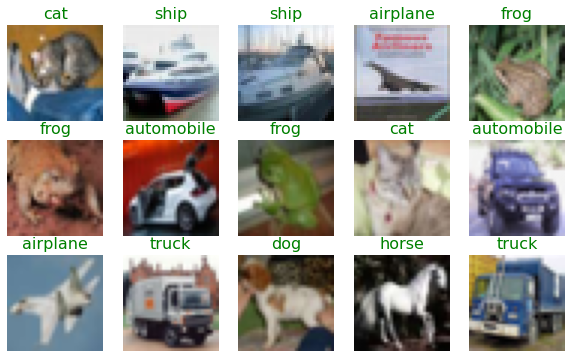

In [36]:
def display_images(images_and_classes, labels, cols=5):
  rows = 3
  fig = plt.figure()
  fig.set_size_inches(cols * 2, rows * 2)
  for i, (image, label) in enumerate(zip(images_and_classes, labels)):
    plt.subplot(rows, cols, i + 1)
    plt.axis('off')
    plt.imshow(image)
    plt.title(class_names[label], fontsize=16, c="green")

display_images(X_test_tensors[:15], tf.squeeze(y_test))

> Aplying the `Regulirization` consept to the model.

In [40]:
model = keras.Sequential([
    keras.layers.Input(shape=(32, 32, 3)),
    keras.layers.Conv2D(64, 3, activation='relu',
          kernel_regularizer =keras.regularizers.l2(0.01),                  
    ),
    keras.layers.Conv2D(128, 3, activation='relu',
        kernel_regularizer= keras.regularizers.l2(l2=0.01)
    ),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Conv2D(256, 3, activation='relu',
                        kernel_regularizer = keras.regularizers.l2(0.01)
    ),
    keras.layers.Conv2D(64, 3, activation='relu',
                        kernel_regularizer = keras.regularizers.l2(0.01)
                        ),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu', 
                       kernel_regularizer= keras.regularizers.l2(0.01)
                       ),
    keras.layers.Dense(10, activation='softmax'),
], name='my_model')
model.compile(
    loss = "categorical_crossentropy",
    metrics=['acc'],
    optimizer = 'adam'
)
model.summary()


Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 12, 12, 256)       295168    
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 10, 10, 64)        147520    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1600)              0  

In [41]:

history = model.fit(X_train_tensors, y_train_tensors, batch_size=64, epochs=20, verbose=1,
                  validation_data=(X_test_tensors, y_test_tensors)
                  )

Epoch 1/20
782/782 [==============================] - 11s 13ms/step - loss: 2.5767 - acc: 0.2203 - val_loss: 1.9640 - val_acc: 0.3021
Epoch 2/20
782/782 [==============================] - 10s 13ms/step - loss: 1.9250 - acc: 0.3281 - val_loss: 1.7553 - val_acc: 0.4013
Epoch 3/20
782/782 [==============================] - 10s 13ms/step - loss: 1.7589 - acc: 0.4063 - val_loss: 1.7408 - val_acc: 0.4251
Epoch 4/20
782/782 [==============================] - 10s 13ms/step - loss: 1.7074 - acc: 0.4303 - val_loss: 1.6862 - val_acc: 0.4461
Epoch 5/20
782/782 [==============================] - 10s 13ms/step - loss: 1.6605 - acc: 0.4533 - val_loss: 1.6425 - val_acc: 0.4687
Epoch 6/20
782/782 [==============================] - 10s 13ms/step - loss: 1.6266 - acc: 0.4637 - val_loss: 1.6044 - val_acc: 0.4755
Epoch 7/20
782/782 [==============================] - 10s 13ms/step - loss: 1.6075 - acc: 0.4686 - val_loss: 1.5737 - val_acc: 0.4889
Epoch 8/20
782/782 [==============================] - 10s 13ms

### Plotting the model training `histoty`

In [42]:
import pandas as pd

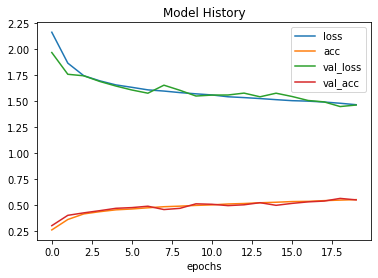

In [43]:
pd.DataFrame(history.history).plot(xlabel="epochs", title="Model History")

> As we can see the `L1` regularization reduces overfitting though our goal was't for the model accuracy but we managed to handle the overfitting problem for `10` epochs trainning.